In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename="C:\\Users\\birad\OneDrive\\Documents\\Heart_attack_Dataset_Kaggle_Notepad.csv"
df = pd.read_csv(filename)

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
def Outliner_info(quart_v):
    print("----------------for",quart_v,"-------------------")
    Q1,Q2,Q3 = df[quart_v].quantile([0.25,0.50,0.75]) 
    quartiles = [Q1,Q2,Q3]
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5*IQR
    upper_b = Q3 + 1.5*IQR
    print(["Q1","Q2  ","Q3 ","IQR","lower_b  ","upper_b"])
    print([Q1,Q2,Q3,IQR,lower_b,upper_b])
    #value lesser than lower_b and values greater than upper_b are considered as outliners
    lower_index = np.where(df[quart_v] <= lower_b)
    upper_index = np.where(df[quart_v] >= upper_b)
    print("index for lower outliners: ", lower_index)
    print("index for upper outliners: ",upper_index) 
    mean = df[quart_v].mean()
    print("mean of ",quart_v,"=",mean)
    val_list = []
    for val in df[quart_v]:
        if val >= upper_b:
            val_list.append(val)
    print("val_list = ",val_list)   

In [5]:
df1 = df.drop([85], axis = 0, inplace = False) 
df1.at[28,"chol"]= 369 
df1.at[96,"chol"]= 369 
df1.at[220,"chol"]= 369 
df1.at[246,"chol"]= 369

In [6]:
df1.drop([248,223], axis = 0, inplace = True)

In [7]:
temp_list = [  8, 101, 110, 152, 195, 203, 228, 241, 260, 266, 292]
for i in temp_list:
    df1.at[i,"trtbps"]=170

In [8]:
df1.at[272,"thalachh"] = 84

In [9]:
temp_list1 = [101, 204, 220, 221, 250, 291, 295]
for j in temp_list1:
    df1.at[j,"oldpeak"]= 4.0

In [10]:
temp_list2 = [ 92, 158, 163, 164, 251]
for k in temp_list2:
    df1.at[k,"caa"]= 3

In [11]:
df1.at[48,"thall"]=1
df1.at[281,"thall"]=1

In [12]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
duplicate_rows = df1[df1.duplicated()]
duplicate_rows

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,3,2,1


In [14]:
df1.duplicated().sum()
df1 = df1.drop_duplicates()

In [15]:
df1

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


AdaBoost 

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [17]:
# Load the dataset

# Split the data into features and labels
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sTANDARD SCALING

In [18]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

iNITIAL MODEL

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report


# Create a GradientBoostingClassifier OBJECT


base_estimator = DecisionTreeClassifier(max_depth=5)

ada = AdaBoostClassifier(base_estimator=base_estimator,
                         n_estimators=1000,
                         random_state=42)


ada.fit(X_train, y_train)

y_pred_1 = ada.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)

Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.8888888888888888
F1 Score: 0.9411764705882353
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.89      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



iNITIAL CONFUSION MATRIX

[[12  0]
 [ 2 16]]


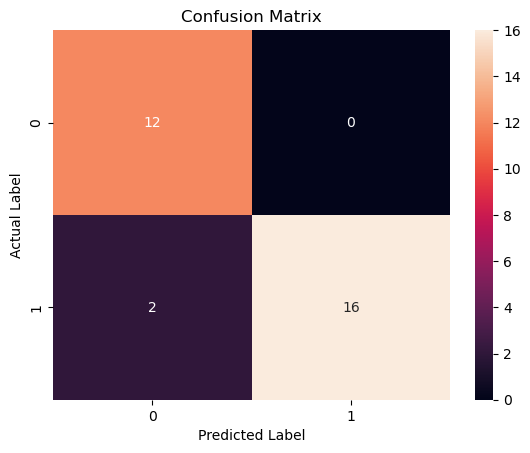

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

GridseaschCV

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

ada.set_params(base_estimator__max_depth=5)

param_grid = {'base_estimator__max_depth': np.arange(100, 500, 100), 'n_estimators': np.arange(1000, 5000, 1000)}

grid = GridSearchCV(ada, param_grid=param_grid, cv = 5, scoring='f1', verbose = 3, n_jobs = -1)
grid.fit(X_train, y_train)
print("best parameters: ", grid.best_params_)
print("best score: ", grid.best_score_)
print("best estimator: ", grid.best_estimator_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
best parameters:  {'base_estimator__max_depth': 100, 'n_estimators': 1000}
best score:  0.7484704696646133
best estimator:  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=100),
                   n_estimators=1000, random_state=42)


fINAL MODEL

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

base_estimator = DecisionTreeClassifier(max_depth=5)
ada_TUNED = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=1000, random_state=42)

ada_TUNED.fit(X_train, y_train)

y_pred = ada_TUNED.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# classification_report
cr = classification_report(y_test, y_pred)
print(cr)


Accuracy: 0.9333333333333333
Precision: 1.0
Recall: 0.8888888888888888
F1 Score: 0.9411764705882353
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.89      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



[[12  0]
 [ 2 16]]


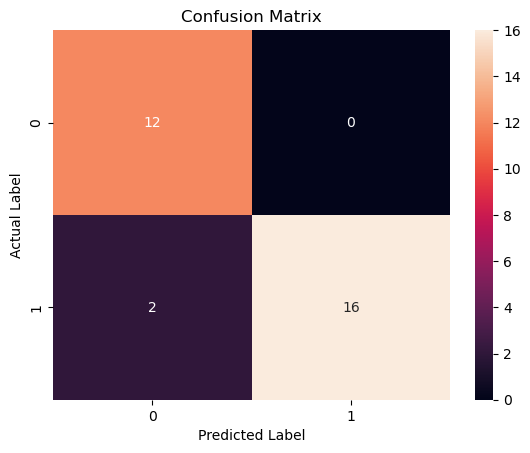

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ada_TUNED, X_train, y_train, cv=5, scoring="f1")
for i in range(5):
    print("Fold", i, ":", scores[i])
print("\nMean:", scores.mean())
print("Standard Deviation:", scores.std()) 
print("Variance:", scores.var())

Fold 0 : 0.7936507936507937
Fold 1 : 0.7719298245614034
Fold 2 : 0.7936507936507937
Fold 3 : 0.8275862068965517
Fold 4 : 0.7719298245614034

Mean: 0.7917494886641891
Standard Deviation: 0.020382043397385034
Variance: 0.0004154276930528868


lEARNING CURVE

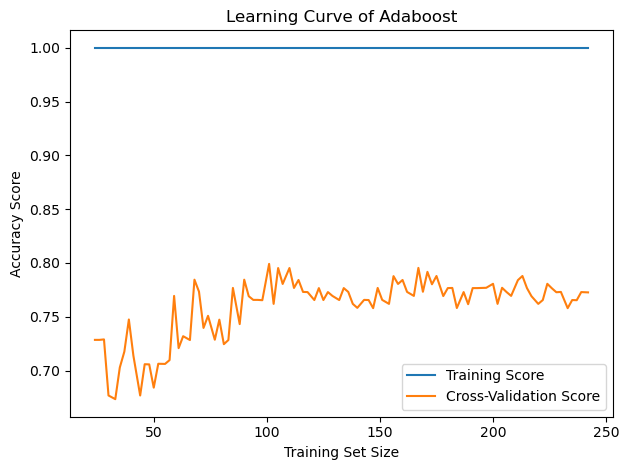

In [25]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(ada_TUNED, X_train, y_train, cv=10, scoring="accuracy",n_jobs=-1, train_sizes=np.linspace(0.1,1.0,num=100))
import matplotlib.pyplot as plt
import numpy as np
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.title("Learning Curve of Adaboost")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout() 
plt.show()